objective: 

take a network, $G$, a function $h:V(G)\rightarrow X$
We want:
* identify minima
* partition into basins
* indentify saddle points

In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib
import landscapeofcomplexnetworks as lcn

In [2]:
G = nx.karate_club_graph()
h = lcn.perturb_function(lambda x: -math.log(G.degree(x)), G.nodes())
karate_club = lcn.NetworkLandscape(G,h)

In [9]:
critical_nodes, att_map = lcn.Fast_search_of_nondegenerate_critical_nodes(karate_club)
nx.set_node_attributes(G, name='basin', values={x:y for colouring in att_map.values() for x,y in colouring.items()})

In [10]:
layout = nx.spring_layout(G)

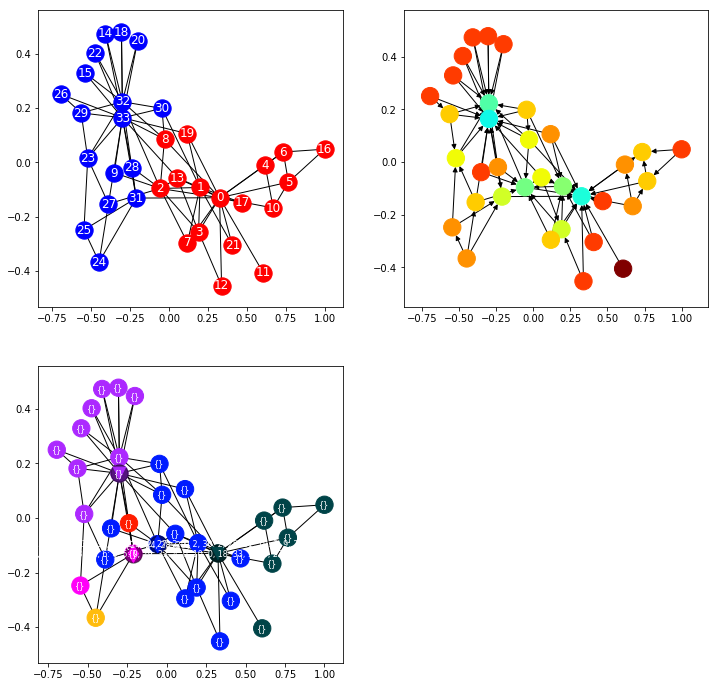

In [11]:
%matplotlib inline   
fig = matplotlib.pyplot.figure(figsize=(12,12))
ax_fast_alg = fig.add_subplot(2, 2, 3)
club_split = fig.add_subplot(2, 2, 1)
gradient = fig.add_subplot(2, 2, 2)

# draw results of algorithm
nx.draw_networkx_edges(G, pos=layout, ax=ax_fast_alg)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[v for k,v in G.nodes.data('basin')], cmap='gist_ncar',vmin=-3, vmax=40, ax=ax_fast_alg)

nx.draw_networkx_nodes(G.subgraph(critical_nodes[1]), pos=layout, nodesize=[h(x)*500 for x in G.subgraph(critical_nodes[1]).nodes()], node_color='k', alpha=0.5, ax=ax_fast_alg)
nx.draw_networkx_nodes(G.subgraph(critical_nodes[0]), pos=layout, nodesize=[h(x)*500 for x in G.subgraph(critical_nodes[0]).nodes()], node_color='k', alpha=0.5, ax=ax_fast_alg)

nx.draw_networkx_nodes(G.subgraph(critical_nodes[1]), pos=layout, node_size=150, node_color=[v for k,v in G.subgraph(critical_nodes[1]).nodes.data('basin')], node_shape='d', cmap='gist_ncar',vmin=-3, vmax=40, ax=ax_fast_alg)
nx.draw_networkx_nodes(G.subgraph(critical_nodes[0]), pos=layout, node_size=150, node_color=[v for k,v in G.subgraph(critical_nodes[0]).nodes.data('basin')], node_shape='v', cmap='gist_ncar',vmin=-3, vmax=40, ax=ax_fast_alg)

nx.draw_networkx_labels(G, layout, labels=att_map, font_size=8, font_color='w', ax=ax_fast_alg)

# draw club split
nx.draw_networkx_edges(G, pos=layout, ax=club_split)
club1 = [node for node in G if nx.get_node_attributes(G,"club")[node] == "Mr. Hi"]
club2 = [node for node in G if nx.get_node_attributes(G,"club")[node] == "Officer"]

nx.draw_networkx_nodes(G.subgraph(club1), pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color='r', ax=club_split)
nx.draw_networkx_nodes(G.subgraph(club2), pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color='b', ax=club_split)

nx.draw_networkx_labels(G, layout, font_size=12, font_color='w', ax=club_split)

# Draw gradient

G_directed = nx.DiGraph(G)
for u,v in G.edges:
    if h(u)<h(v):
        G_directed.remove_edge(u,v)
    else:
        G_directed.remove_edge(v,u)
G_directed.edges

nx.draw_networkx_edges(G_directed, pos=layout, ax=gradient)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[h(v) for v in G.nodes], cmap='jet', vmin=-4.5, vmax=0, ax=gradient)

In [ ]:
import dionysus as dn
f = dn.Filtration()
for s in karate_club.get_simplices():
    f.append(s)
f.sort()

In [ ]:
m = dn.homology_persistence(f)

In [ ]:
dgms = dn.init_diagrams(m, f)

In [ ]:
for i, dgm in enumerate(dgms):
    print("Dimension:", i)
    print(dgm)

In [ ]:
f

In [ ]:
for x in karate_club.get_simplices():
    print(x)